In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('Week8_Iris.csv')

In [4]:
print(df.shape[0],df.shape[1])

150 6


In [5]:
print(df.dtypes)

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [6]:
print(df.columns.tolist())

['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


In [7]:
print(df.head(5))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [8]:
print(df.tail(5))

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  


In [11]:
print(df.nunique())

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64


In [53]:
print(df['Species'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [14]:
print(df['SepalLengthCm'].unique())

[5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]


In [15]:
print(df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [20]:
df.drop(columns=['Id'])

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [21]:
print(df.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


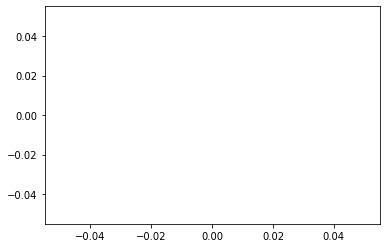

In [23]:
plt.plot(hist=['Id','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],bins=20)
plt.show()

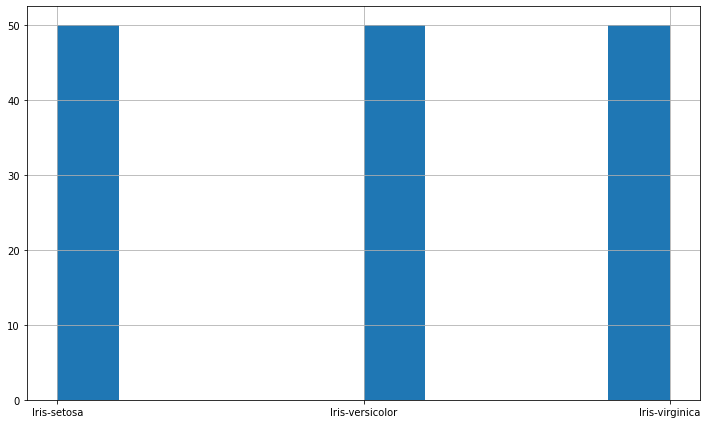

In [26]:
df.iloc[:,-1].hist(figsize=(10,6))
plt.tight_layout()
plt.show()

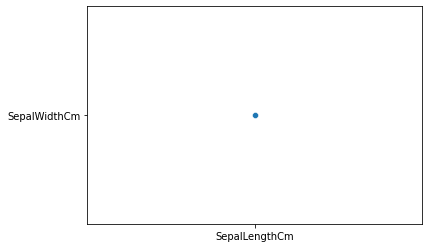

In [28]:
sns.scatterplot(x=['SepalLengthCm'],y=['SepalWidthCm'])
plt.show()

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

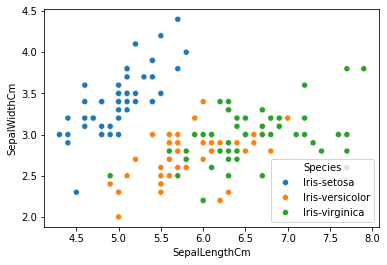

In [55]:
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species')

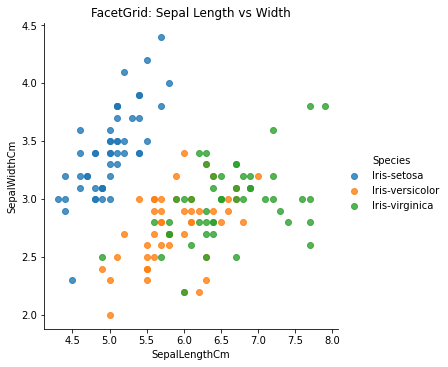

In [56]:
sns.lmplot(x='SepalLengthCm', y='SepalWidthCm', data=df, fit_reg=False,hue='Species')
plt.title("FacetGrid: Sepal Length vs Width")
plt.show()

<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

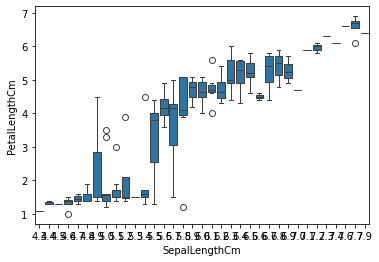

In [42]:
sns.boxplot(x='SepalLengthCm',y='PetalLengthCm',data=df)

<Axes: xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

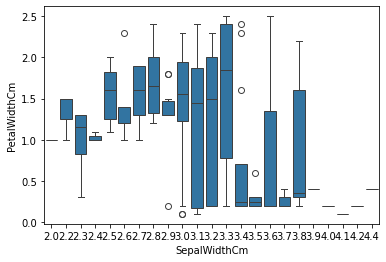

In [43]:
sns.boxplot(x='SepalWidthCm',y='PetalWidthCm',data=df)

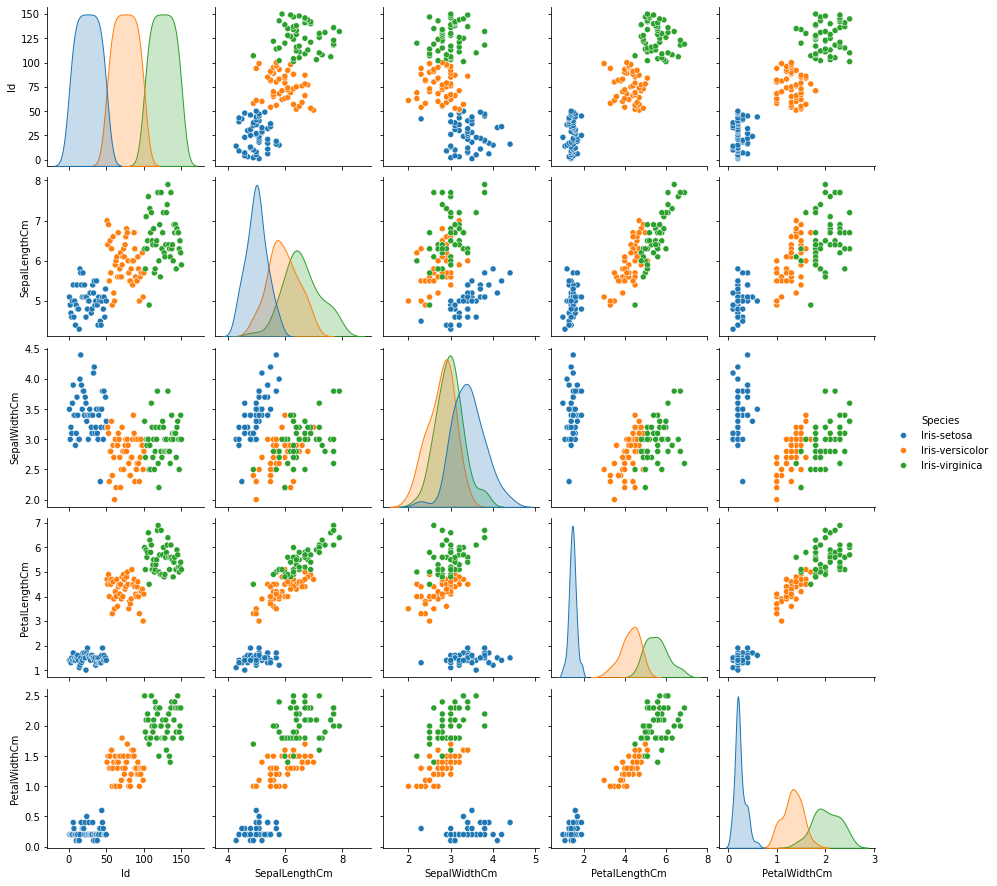

In [58]:
sns.pairplot(df,hue='Species')

<Axes: >

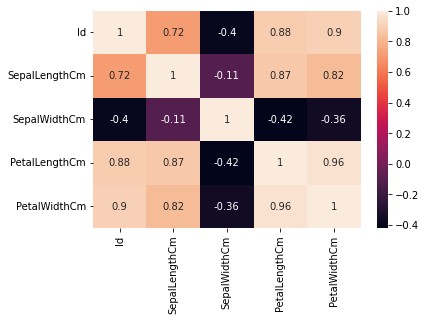

In [49]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)

In [52]:
X=df.drop(columns=['Id','Species'])
y=df['Species']

In [71]:
from sklearn.model_selection import train_test_split,KFold,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [73]:
from sklearn.svm import SVC

In [74]:
model=SVC(kernel='linear',C=1.0,gamma='scale')

In [75]:
model.fit(X_train,y_train)

SVC(kernel='linear')

In [76]:
y_pred=model.predict(X_test)

In [77]:
print(accuracy_score(y_test,y_pred))

1.0


In [78]:
print(confusion_matrix(y_test,y_pred))

[[14  0  0]
 [ 0 18  0]
 [ 0  0 13]]


In [79]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [82]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
results = []
for train_ix, test_ix in kfold.split(X):
    X_train_fold, X_test_fold = X.iloc[train_ix], X.iloc[test_ix]
    y_train_fold, y_test_fold = y.iloc[train_ix], y.iloc[test_ix]
    model.fit(X_train_fold, y_train_fold)
    pred = model.predict(X_test_fold)
    acc = accuracy_score(y_test_fold, pred)
    results.append(acc)



In [85]:
print("KFold Accuracies:", results)



KFold Accuracies: [1.0, 1.0, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667]


In [86]:
print("Mean CV Accuracy:", df.mean(results))

TypeError: unhashable type: 'list'

In [87]:
print("Mean CV Accuracy:", results.mean())


AttributeError: 'list' object has no attribute 'mean'

In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

model = SVC(kernel='linear')
results = cross_val_score(model, X, y, cv=5)  # results is a NumPy array


In [89]:
print("Mean CV Accuracy:", results.mean())


Mean CV Accuracy: 0.9800000000000001


Best Parameters: {'C': 10}
Best Score: 0.9714285714285715


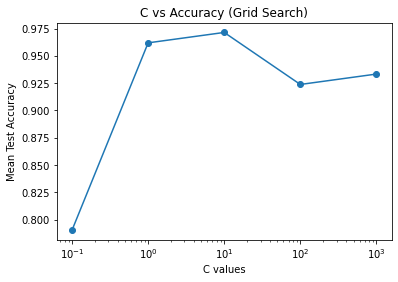

In [90]:
# Step 30-36: Grid Search CV
param_grid = {'C': [0.1, 1, 10, 100, 1000]}
grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

# Plotting GridSearch Results
scores = grid.cv_results_['mean_test_score']
plt.plot(param_grid['C'], scores, marker='o')
plt.xscale('log')
plt.xlabel("C values")
plt.ylabel("Mean Test Accuracy")
plt.title("C vs Accuracy (Grid Search)")
plt.show()
